In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd 
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from hyperparameter_tuning import *

/Users/jordan/anaconda3/envs/challengeQRT/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
X_data_player=pd.read_csv('Train_Data/train_home_player_statistics_df.csv',index_col='ID')
X_data_player_test=pd.read_csv('Test_Data/test_home_player_statistics_df.csv',index_col='ID')

In [3]:
X_data_player

,LEAGUE,TEAM_NAME,POSITION,PLAYER_NAME,PLAYER_ACCURATE_CROSSES_season_sum,PLAYER_ACCURATE_PASSES_season_sum,PLAYER_AERIALS_WON_season_sum,PLAYER_ASSISTS_season_sum,PLAYER_BIG_CHANCES_CREATED_season_sum,PLAYER_BIG_CHANCES_MISSED_season_sum,PLAYER_BLOCKED_SHOTS_season_sum,PLAYER_CAPTAIN_season_sum,PLAYER_CLEARANCES_season_sum,PLAYER_CLEARANCE_OFFLINE_season_sum,PLAYER_DISPOSSESSED_season_sum,PLAYER_DRIBBLED_ATTEMPTS_season_sum,PLAYER_DRIBBLED_PAST_season_sum,PLAYER_DUELS_LOST_season_sum,PLAYER_DUELS_WON_season_sum,PLAYER_ERROR_LEAD_TO_GOAL_season_sum,PLAYER_FOULS_season_sum,PLAYER_FOULS_DRAWN_season_sum,PLAYER_GOALKEEPER_GOALS_CONCEDED_season_sum,PLAYER_GOALS_season_sum,PLAYER_GOALS_CONCEDED_season_sum,PLAYER_HIT_WOODWORK_season_sum,PLAYER_INTERCEPTIONS_season_sum,PLAYER_KEY_PASSES_season_sum,PLAYER_MINUTES_PLAYED_season_sum,PLAYER_OFFSIDES_season_sum,PLAYER_OWN_GOALS_season_sum,PLAYER_PASSES_season_sum,PLAYER_PENALTIES_COMMITTED_season_sum,PLAYER_PENALTIES_MISSES_season_sum,PLAYER_PENALTIES_SAVED_season_sum,PLAYER_PENALTIES_SCORED_season_sum,PLAYER_PENALTIES_WON_season_sum,PLAYER_REDCARDS_season_sum,PLAYER_SAVES_season_sum,PLAYER_SAVES_INSIDE_BOX_season_sum,PLAYER_SHOTS_BLOCKED_season_sum,PLAYER_SHOTS_ON_TARGET_season_sum,PLAYER_SHOTS_TOTAL_season_sum,PLAYER_STARTING_LINEUP_season_sum,PLAYER_SUCCESSFUL_DRIBBLES_season_sum,PLAYER_TACKLES_season_sum,PLAYER_TOTAL_CROSSES_season_sum,PLAYER_TOTAL_DUELS_season_sum,PLAYER_YELLOWCARDS_season_sum,PLAYER_PUNCHES_season_sum,PLAYER_LONG_BALLS_season_sum,PLAYER_LONG_BALLS_WON_season_sum,PLAYER_SHOTS_OFF_TARGET_season_sum,PLAYER_ACCURATE_CROSSES_season_average,PLAYER_ACCURATE_PASSES_season_average,PLAYER_ACCURATE_PASSES_PERCENTAGE_season_average,PLAYER_AERIALS_WON_season_average,PLAYER_ASSISTS_season_average,PLAYER_BIG_CHANCES_CREATED_season_average,PLAYER_BIG_CHANCES_MISSED_season_average,PLAYER_BLOCKED_SHOTS_season_average,PLAYER_CAPTAIN_season_average,PLAYER_CLEARANCES_season_average,PLAYER_CLEARANCE_OFFLINE_season_average,PLAYER_DISPOSSESSED_season_average,PLAYER_DRIBBLED_ATTEMPTS_season_average,PLAYER_DRIBBLED_PAST_season_average,PLAYER_DUELS_LOST_season_average,PLAYER_DUELS_WON_season_average,PLAYER_ERROR_LEAD_TO_GOAL_season_average,PLAYER_FOULS_season_average,PLAYER_FOULS_DRAWN_season_average,PLAYER_GOALKEEPER_GOALS_CONCEDED_season_average,PLAYER_GOALS_season_average,PLAYER_GOALS_CONCEDED_season_average,PLAYER_HIT_WOODWORK_season_average,PLAYER_INTERCEPTIONS_season_average,PLAYER_KEY_PASSES_season_average,PLAYER_MINUTES_PLAYED_season_average,PLAYER_OFFSIDES_season_average,PLAYER_OWN_GOALS_season_average,PLAYER_PASSES_season_average,PLAYER_PENALTIES_COMMITTED_season_average,PLAYER_PENALTIES_MISSES_season_average,PLAYER_PENALTIES_SAVED_season_average,PLAYER_PENALTIES_SCORED_season_average,PLAYER_PENALTIES_WON_season_average,PLAYER_RATING_season_average,PLAYER_REDCARDS_season_average,PLAYER_SAVES_season_average,PLAYER_SAVES_INSIDE_BOX_season_average,PLAYER_SHOTS_BLOCKED_season_average,PLAYER_SHOTS_ON_TARGET_season_average,PLAYER_SHOTS_TOTAL_season_average,PLAYER_STARTING_LINEUP_season_average,PLAYER_SUCCESSFUL_DRIBBLES_season_average,PLAYER_TACKLES_season_average,PLAYER_TOTAL_CROSSES_season_average,PLAYER_TOTAL_DUELS_season_average,PLAYER_YELLOWCARDS_season_average,PLAYER_PUNCHES_season_average,PLAYER_LONG_BALLS_season_average,PLAYER_LONG_BALLS_WON_season_average,PLAYER_SHOTS_OFF_TARGET_season_average,PLAYER_ACCURATE_CROSSES_season_std,PLAYER_ACCURATE_PASSES_season_std,PLAYER_ACCURATE_PASSES_PERCENTAGE_season_std,PLAYER_AERIALS_WON_season_std,PLAYER_ASSISTS_season_std,PLAYER_BIG_CHANCES_CREATED_season_std,PLAYER_BIG_CHANCES_MISSED_season_std,PLAYER_BLOCKED_SHOTS_season_std,PLAYER_CAPTAIN_season_std,PLAYER_CLEARANCES_season_std,PLAYER_CLEARANCE_OFFLINE_season_std,PLAYER_DISPOSSESSED_season_std,PLAYER_DRIBBLED_ATTEMPTS_season_std,PLAYER_DRIBBLED_PAST_season_std,PLAYER_DUELS_LOST_season_std,PLAYER_DUELS_WON_season_std,PLAYER_ERROR_LEAD_TO_GOAL_season_std,PLAYER_FOULS_season_std,PLAYER_FOULS

In [4]:
def calculate_nan_percentage(dataframe):
    # Count the number of NaN values in each column
    nan_counts = dataframe.isna().sum()

    # Calculate the percentage of NaN values in each column
    nan_percentage = (nan_counts / len(dataframe)) * 100

    return nan_percentage.sort_values(ascending=False)

PLAYER_LONG_BALLS_WON_season_std      100.000000
PLAYER_LONG_BALLS_5_last_match_sum    100.000000
PLAYER_SHOTS_OFF_TARGET_season_sum    100.000000
PLAYER_CAPTAIN_season_average         100.000000
PLAYER_LONG_BALLS_season_average      100.000000
                                         ...    
PLAYER_ASSISTS_season_sum               1.517216
PLAYER_MINUTES_PLAYED_season_sum        1.517216
TEAM_NAME                               0.000000
PLAYER_NAME                             0.000000
LEAGUE                                  0.000000
Length: 306, dtype: float64

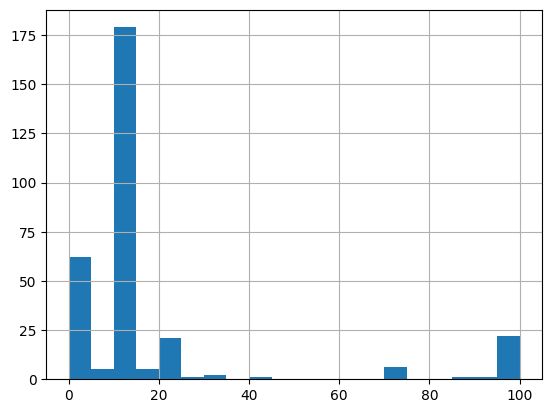

In [5]:
nan_value_X_data_player=calculate_nan_percentage(X_data_player)
nan_value_X_data_player.hist(bins=20)
nan_value_X_data_player

In [6]:
columns_to_drop_X_data_player_home=list(nan_value_X_data_player[nan_value_X_data_player>40].index) 


In [7]:
X_data_player_nona=X_data_player.drop(columns=columns_to_drop_X_data_player_home)

In [8]:
X_data_player_test_nona=X_data_player_test.drop(columns=columns_to_drop_X_data_player_home)

In [9]:
X_data_player_nona_filled=X_data_player_nona.fillna(0)
X_data_player_test_nona_filled=X_data_player_test_nona.fillna(0)

In [10]:
corr_matrix = X_data_player_nona_filled.drop(columns=['LEAGUE','TEAM_NAME','POSITION','PLAYER_NAME']).corr()

In [49]:
second_max_index = corr_matrix['PLAYER_RATING_season_average'].sort_values(ascending=False).index[1]
second_max_index

'PLAYER_RATING_5_last_match_average'

In [50]:
corr_matrix.loc['PLAYER_RATING_season_average','PLAYER_RATING_5_last_match_average']

0.9373275129214971

In [24]:
correlated_columns = set()

# Iterate through the correlation matrix
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.9:  # Check if correlation is higher than 0.9
            colname_i = corr_matrix.columns[i]  # Get the name of the column
            colname_j = corr_matrix.columns[j]
            if 'average' in colname_i and 'average' not in colname_j:
                correlated_columns.add(colname_j)
            elif 'average' in colname_j and 'average' not in colname_i:
                correlated_columns.add(colname_i)
            else:
                correlated_columns.add(colname_j)

In [25]:
X_data_player_nona_filled_nocorr=X_data_player_nona_filled.drop(columns=list(correlated_columns))

In [26]:
X_data_player_test_nona_filled_nocorr=X_data_player_test_nona_filled.drop(columns=list(correlated_columns))

In [27]:
sum_columns=[col for col in X_data_player_nona_filled_nocorr.columns if 'sum' in col]
std_columns=[col for col in X_data_player_nona_filled_nocorr.columns if 'std' in col]
avg_columns=[col for col in X_data_player_nona_filled_nocorr.columns if 'average' in col]

In [28]:
radical_avg=[col.rsplit('_',1)[0] for col in avg_columns]
radical_sum=[col.rsplit('_',1)[0] for col in sum_columns]
radical_std=[col.rsplit('_',1)[0] for col in std_columns]

In [17]:
col_radical_to_drop=[]

In [29]:
for col in sum_columns+std_columns:
    col_radical=col.rsplit('_',1)[0]
    if col_radical in radical_avg :
        col_radical_to_drop.append(col)

In [30]:
col_radical_to_drop

['PLAYER_ASSISTS_season_sum',
 'PLAYER_DISPOSSESSED_season_sum',
 'PLAYER_GOALS_CONCEDED_season_sum',
 'PLAYER_SHOTS_BLOCKED_season_sum',
 'PLAYER_YELLOWCARDS_season_sum',
 'PLAYER_GOALS_CONCEDED_5_last_match_sum',
 'PLAYER_ASSISTS_season_sum',
 'PLAYER_DISPOSSESSED_season_sum',
 'PLAYER_GOALS_CONCEDED_season_sum',
 'PLAYER_SHOTS_BLOCKED_season_sum',
 'PLAYER_YELLOWCARDS_season_sum',
 'PLAYER_GOALS_CONCEDED_5_last_match_sum',
 'PLAYER_AERIALS_WON_season_std',
 'PLAYER_ASSISTS_season_std',
 'PLAYER_BIG_CHANCES_CREATED_season_std',
 'PLAYER_BIG_CHANCES_MISSED_season_std',
 'PLAYER_BLOCKED_SHOTS_season_std',
 'PLAYER_DISPOSSESSED_season_std',
 'PLAYER_DRIBBLED_PAST_season_std',
 'PLAYER_FOULS_season_std',
 'PLAYER_FOULS_DRAWN_season_std',
 'PLAYER_GOALS_season_std',
 'PLAYER_GOALS_CONCEDED_season_std',
 'PLAYER_HIT_WOODWORK_season_std',
 'PLAYER_INTERCEPTIONS_season_std',
 'PLAYER_KEY_PASSES_season_std',
 'PLAYER_OFFSIDES_season_std',
 'PLAYER_SHOTS_BLOCKED_season_std',
 'PLAYER_SHOTS_ON_

In [39]:
X_data_player_test_nona_filled_nocorr_avg=X_data_player_test_nona_filled_nocorr.drop(columns=col_radical_to_drop,axis=1) 


In [40]:
X_data_player_nona_filled_nocorr_avg=X_data_player_nona_filled_nocorr.drop(columns=col_radical_to_drop)


In [42]:
X_data_player_nona_filled_nocorr_avg.to_csv('X_data_home_player_preproc.csv',index='ID')

In [34]:
X_data_player_test_nona_filled_nocorr_avg.to_csv('X_data_home_player_test_preproc.csv',index='ID')

In [41]:
X_data_player_nona_filled_nocorr_avg

,LEAGUE,TEAM_NAME,POSITION,PLAYER_NAME,PLAYER_AERIALS_WON_season_average,PLAYER_ASSISTS_season_average,PLAYER_BIG_CHANCES_CREATED_season_average,PLAYER_BIG_CHANCES_MISSED_season_average,PLAYER_BLOCKED_SHOTS_season_average,PLAYER_CLEARANCE_OFFLINE_season_average,PLAYER_DISPOSSESSED_season_average,PLAYER_DRIBBLED_PAST_season_average,PLAYER_ERROR_LEAD_TO_GOAL_season_average,PLAYER_FOULS_season_average,PLAYER_FOULS_DRAWN_season_average,PLAYER_GOALS_season_average,PLAYER_GOALS_CONCEDED_season_average,PLAYER_HIT_WOODWORK_season_average,PLAYER_INTERCEPTIONS_season_average,PLAYER_KEY_PASSES_season_average,PLAYER_OFFSIDES_season_average,PLAYER_OWN_GOALS_season_average,PLAYER_PENALTIES_COMMITTED_season_average,PLAYER_PENALTIES_MISSES_season_average,PLAYER_PENALTIES_SAVED_season_average,PLAYER_PENALTIES_SCORED_season_average,PLAYER_PENALTIES_WON_season_average,PLAYER_REDCARDS_season_average,PLAYER_SHOTS_BLOCKED_season_average,PLAYER_SHOTS_ON_TARGET_season_average,PLAYER_SHOTS_TOTAL_season_average,PLAYER_STARTING_LINEUP_season_average,PLAYER_SUCCESSFUL_DRIBBLES_season_average,PLAYER_TACKLES_season_average,PLAYER_YELLOWCARDS_season_average,PLAYER_ACCURATE_CROSSES_season_std,PLAYER_ACCURATE_PASSES_PERCENTAGE_season_std,PLAYER_CLEARANCES_season_std,PLAYER_DUELS_LOST_season_std,PLAYER_PASSES_season_std,PLAYER_RATING_season_std,PLAYER_TOTAL_CROSSES_season_std,PLAYER_TOTAL_DUELS_season_std,PLAYER_ACCURATE_CROSSES_5_last_match_average,PLAYER_ACCURATE_PASSES_PERCENTAGE_5_last_match_average,PLAYER_AERIALS_WON_5_last_match_average,PLAYER_ASSISTS_5_last_match_average,PLAYER_BIG_CHANCES_CREATED_5_last_match_average,PLAYER_BIG_CHANCES_MISSED_5_last_match_average,PLAYER_BLOCKED_SHOTS_5_last_match_average,PLAYER_CLEARANCES_5_last_match_average,PLAYER_CLEARANCE_OFFLINE_5_last_match_average,PLAYER_DISPOSSESSED_5_last_match_average,PLAYER_DRIBBLED_PAST_5_last_match_average,PLAYER_ERROR_LEAD_TO_GOAL_5_last_match_average,PLAYER_FOULS_5_last_match_average,PLAYER_FOULS_DRAWN_5_last_match_average,PLAYER_GOALKEEPER_GOALS_CONCEDED_5_last_match_average,PLAYER_GOALS_5_last_match_average,PLAYER_GOALS_CONCEDED_5_last_match_average,PLAYER_HIT_WOODWORK_5_last_match_average,PLAYER_INTERCEPTIONS_5_last_match_average,PLAYER_KEY_PASSES_5_last_match_average,PLAYER_OFFSIDES_5_last_match_average,PLAYER_OWN_GOALS_5_last_match_average,PLAYER_PASSES_5_last_match_average,PLAYER_PENALTIES_COMMITTED_5_last_match_average,PLAYER_PENALTIES_MISSES_5_last_match_average,PLAYER_PENALTIES_SAVED_5_last_match_average,PLAYER_PENALTIES_SCORED_5_last_match_average,PLAYER_PENALTIES_WON_5_last_match_average,PLAYER_RATING_5_last_match_average,PLAYER_REDCARDS_5_last_match_average,PLAYER_SAVES_INSIDE_BOX_5_last_match_average,PLAYER_SHOTS_BLOCKED_5_last_match_average,PLAYER_SHOTS_ON_TARGET_5_last_match_average,PLAYER_SHOTS_TOTAL_5_last_match_average,PLAYER_STARTING_LINEUP_5_last_match_average,PLAYER_SUCCESSFUL_DRIBBLES_5_last_match_average,PLAYER_TACKLES_5_last_match_average,PLAYER_TOTAL_CROSSES_5_last_match_average,PLAYER_TOTAL_DUELS_5_last_match_average,PLAYER_YELLOWCARDS_5_last_match_average,PLAYER_DRIBBLED_ATTEMPTS_5_last_match_std,PLAYER_DUELS_LOST_5_last_match_std,PLAYER_DUELS_WON_5_last_match_std,PLAYER_MINUTES_PLAYED_5_last_match_std
ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,Ligue 1,Toulouse,defender,Agustín Rogel,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,18.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,0.0,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,0.0,82.0,0.0,0.0,0.0,0.0,0.0,82.0,0.0,0.0,0.0,0.0,18.0,100.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0,0.0
0,Ligue 1,Toulouse,defender,Mathieu Goncalves,6.0,0.0,0.0,0.0,9.0,0.0,8.0,25.0,0.0,10.0,3.0,0.0,57.0,0.0,3.0,0.0,0.0,42.0,71.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,0.0,28.0,3.0,10.0,14.0,0.0,31.0,33.0,30.0,35.0,59.0,0.0,32.0,0.0,75.0,8.0,0.0,0.0,0.0,12.0,14.0,0.0,0.0,28.0,0.0,10.0,0.0,0.0,0.0,60.0,0.0,